Diabetes--Prediction

Now-a-days diabetes had became a major challenge all over the world as it is a chronic disease.the main aim of this dataset is to predict whether the patient has diabetes or not by using EDA and Machine Learning.

In EDA it is known how to make inferences from the visualisations and data analysis,while in ML we use Machine Learning models and then we will choose the best performing models among them.

In [1]:
#Importing packages needed for the execution.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/diabetes.csv') #Loading dataset
df.head() #Loading dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape #shape func() gives us the total number of rows and columns present in a dataset.

(768, 9)

It is to be noted that there are 768 rows and 9 columns are present in this dataset.

In [5]:
df.info()  #The info() method prints information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe() #The describe () method gives the statistical information about the data frame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.dtypes #The dtype() function is used to create a data type object.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [50]:
df.isnull().head()  #head()function gives the first 5 records 
#The isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum() #isnull().sum() returns the number of missing values in the data set.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above it is to be known that there are no null values present in the dataset.

In [10]:
df['Outcome'].value_counts() ##value_counts()function returns object containing counts of unique values,it is handy for categorical data

0    500
1    268
Name: Outcome, dtype: int64

From the above code it is to be known that out of 768 persons,500 persons are non diabetic ,while 268 persons are diabetic.

where 0 represents non diabetic while 1 represents diabetic.

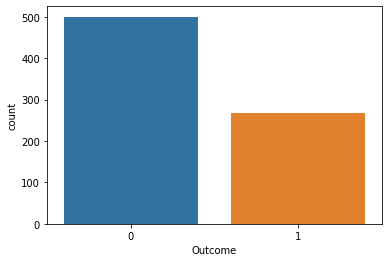

In [11]:
sns.countplot(x='Outcome',data = df) #countplot is applicable only for categorical data to count observations in each category.
#x-axis= Outcome,Y-axis = count

From the above plot it is to be known that non diabetic are more than the diabetic

#### Let us plot the correlation matrix and get the sense of the correlation of independent variables on the dependent variable. 

Correlation is an indication about the changes between two variables.  We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable

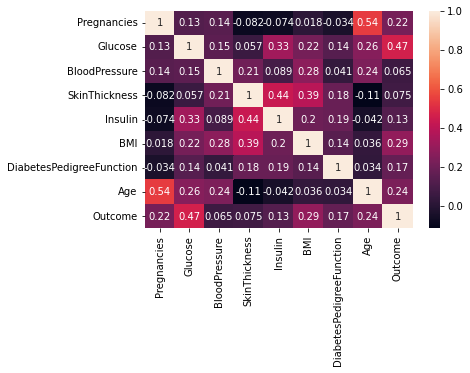

In [12]:
#correlation matrix

corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

In the above graph it is to be observed that pregnancies column had a value of 1.0,which indicates that pregnancies column had 100 % of correlation(similar)while in the case of Glucose had a correlation of 80 per,bloodpressure had a correlation of 60 - 80 per,skinThickness had a correlation of 60 per respectively.

It is to be noted that Glucose becomes more correlated to the outcome .Therefore we can predict the maximum outcome if we know the Glucose value which is an independent variable.

at second BMI,at third Insulin, at Fourth age becomes more correlated to Outcome after Glucose.

Histogram plot

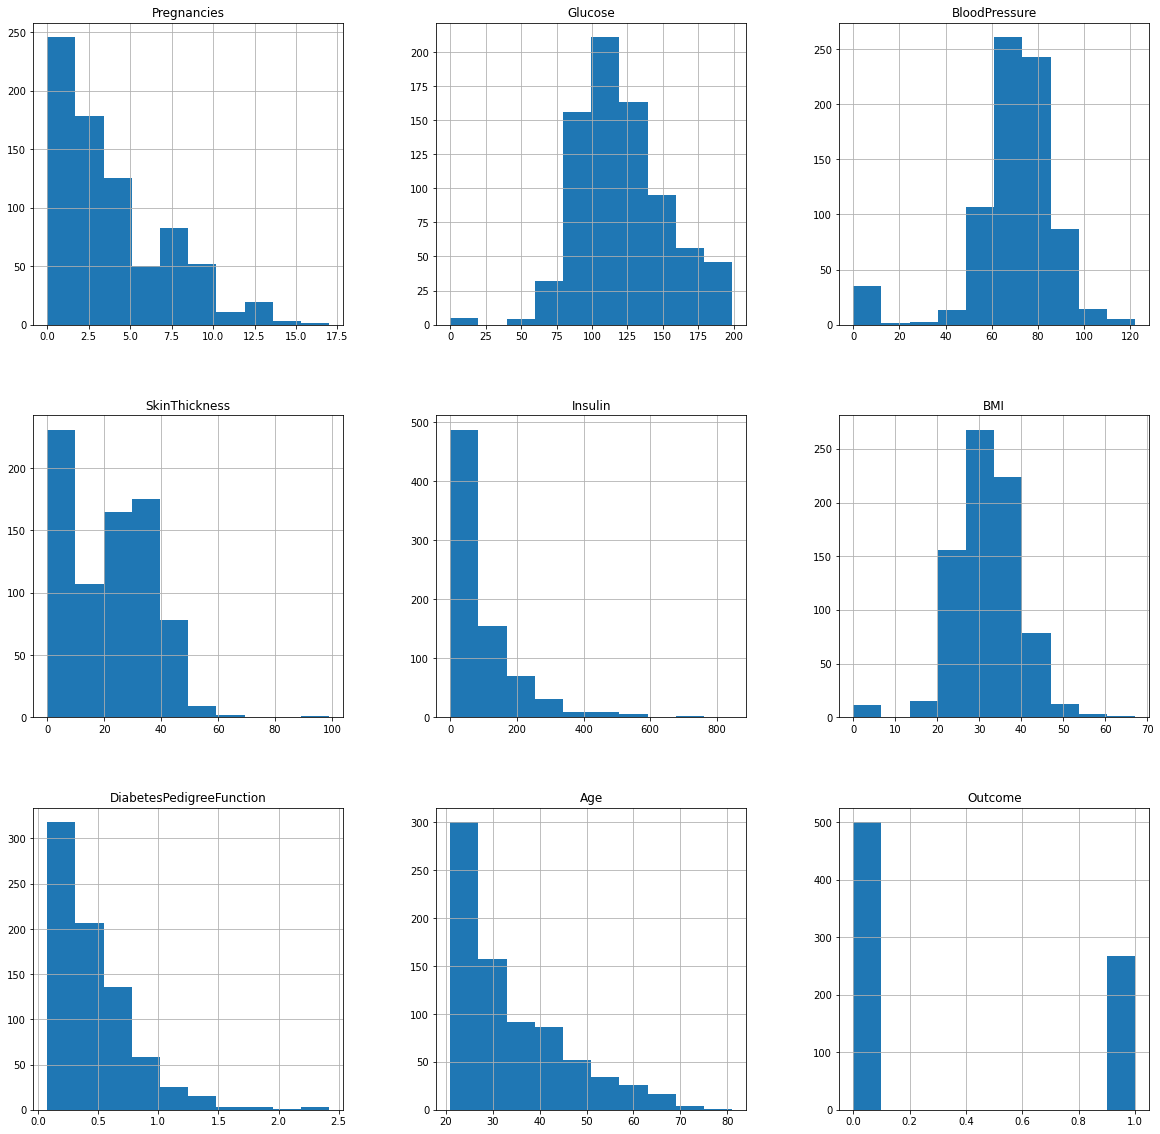

In [13]:
p = df.hist(figsize = (20,20))  ##Histogram is used to see the distribution of a numerical value.

From the above plot it is to be noted that the pregnancies,skin thickness,insulin,Diabetes pedigree function,Age are Right skewed .

while Glucose,blood pressure,BmI are symmetric while from the outcomes it is to be known that the proportion of the non diabetic is more than that of the diabetic.

###creating Feature matrix and dependent variable vector

In [51]:
X = df.iloc[:,:-1].values  #here all the independent columns are taken as an array which indicates a feature matrix
y = df.iloc[:,-1].values  

In the above code X = df.iloc[:,:-1].values only all the independent variables are taken except the lastcolumn Outcome which indicates dependent variable

while in y = df.iloc[:,-1].values only the last column Outcome variable is taken

In [52]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

The above code shows us an array which consists of firstrow of an feature matrix

#Model Building

Splitting the dataset

In [16]:
#Separating the X and Y variable
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

Now we will split the data into training and testing data using the train_test_split function

In [17]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= df['Outcome'], random_state = 0)

In the above code X indicates the independent variables while y indicates the dependent variables, 20 percent from the whole dataset comes under test_size while remaining 80 percent comes under the train_size while the random_state indicates 0.

In [18]:
X_train.shape

(614, 8)

From the above it is to be known that X_train data has 614 rows and 8 columns

In [19]:
X_test.shape

(154, 8)

X_test data has 154 rows and 8 columns.

In [53]:
print (y_train.value_counts())  #value_counts()function returns object containing counts of unique values,it is handy for categorical data
print (y_test.value_counts())

0    400
1    214
Name: Outcome, dtype: int64
0    100
1     54
Name: Outcome, dtype: int64


Here the value_count of y_train data 0 -non diabetic is 400 while the 1- diabetic is 214.

Here the value_count of y_test data 0 -non diabetic is 100 while the 1- diabetic is 54.

#### Applying Standard scaling to get optimized result. 
#### Though a tree based algorithm does not have any effect of scaling, it is still a good practice to do so. Because you will may not apply only a single algorithm on the given data.

#Feature scaling
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Hence the feature scaling had made successfully for testing and training dataset.

In [54]:
X_train[0]  # the first obeservation of the X-train dataset.

array([ 0.8803979 ,  2.36205262,  1.05918965, -1.26350208, -0.6596596 ,
        1.01966869, -0.07857322,  0.6266495 ])

##Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Building the model using RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [25]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

Getting the accuracy score for Random Forest

In [27]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.8181818181818182


From the above it is to be noted that the accuracy score is 0.8181818181818182 for X_test data

#Classification report and confusion matrix of random forest model

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[92  8]
 [20 34]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       100
           1       0.81      0.63      0.71        54

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154



##Decision Tree
Building the model using DecisionTree

Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.
Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Now  the predictions on the testing data directly as it is of more importance.

Getting the accuracy score for Decision Tree

In [30]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6818181818181818


##Classification report and confusion matrix of the decision tree model

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[80 20]
 [29 25]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       100
           1       0.56      0.46      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.67      0.68      0.67       154



###KNeighborsClassifier

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25,metric = 'minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

predicting the model based on the x_test.

In [36]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In the above the x_test data values are taken into the y_pred in which the result is displayed in the form of an arrays.

plotting the Confusion matrix based on the results of y_pred

The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data. It can only be determined if the true values for test data are known.

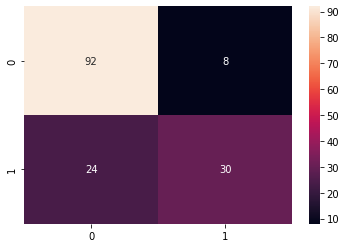

In [55]:
from sklearn.metrics import confusion_matrix  #here the first parameter includes the true values which is Y_test and the second value is y_pred
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm , annot=True)

Here 92 represents the true negative while 30 represents the true positives,while 9 is false negatives,24 is false positives.

Here False negative is nothing but a person is suffering with a diabetes but it is predicting that he is not having diabetes.which is very dangerous.

while False positive is nothing but a person is not with diabetes but it is predicting that he had a diabetes.

here the vertical rows represents the prediction values while the horizontal rows represents the actual values.

accuracy score of a confusion matrix

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7922077922077922

Here the accuracy score is 0.7922077922077922 which indicates 79 percent of our model predicted is correct.

##Saving the classifier model

In [39]:
import pickle
pickle.dump(knn , open('classifier.pkl','wb'))

In [40]:
pickle.dump(sc,open('sc.pkl','wb'))

now for the last time we'll be taking the head and tail of the dataset so that we can take any random set of features of the dataset to know if our model is good enough to give the right prediction.

In [46]:
df.head() #head() gives the first 5 records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df.tail()  # tail () gives the last 5 records.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


AIM : Predictions if a person is suffering with Diabetes or not:

In [57]:
rfc.predict([[6,148,72,35,0,33.6,0.627,50]]) #1st patient

array([1])

It indicates that the 1st patient is suffering with the diabetes.

In [48]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([0])

It indicates that the 4th person is non diabetic

In [49]:
rfc.predict([[10,101,76,48,180,32.9,0.171,63]]) #763 patient

array([1])

It indicates that the person is diabetic.

In [56]:
rfc.predict([[1,93,70,31,0,30.4,0.315,23]])#767 patient

array([1])

It indicates that the person is diabetic.

###conclusions:

Among all the models that had been used in this dataset ,Random forest is the best model for this prediction since it has an accuracy_score of 0.81.


 Glucose as a feature is the most important in this dataset.

 Glucose,BMI,Insulin acts as an independent variables while outcome acts as an dependent variable.

 From the above predictions it is to be known that the proportion of the non diabetic is more than that of the diabetic.
